In [44]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [45]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [46]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc
from sqlalchemy import and_

In [47]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [48]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [49]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [50]:
# Save references to each table
measurement = Base.classes.measurement
station=Base.classes.station

In [51]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [52]:
# Find the most recent date in the data set.
recent_date=session.query(measurement.date).order_by(desc(measurement.date)).first()



In [53]:
#convert the date into date format
recent_date=dt.date(2017, 8, 23)
recent_date

datetime.date(2017, 8, 23)

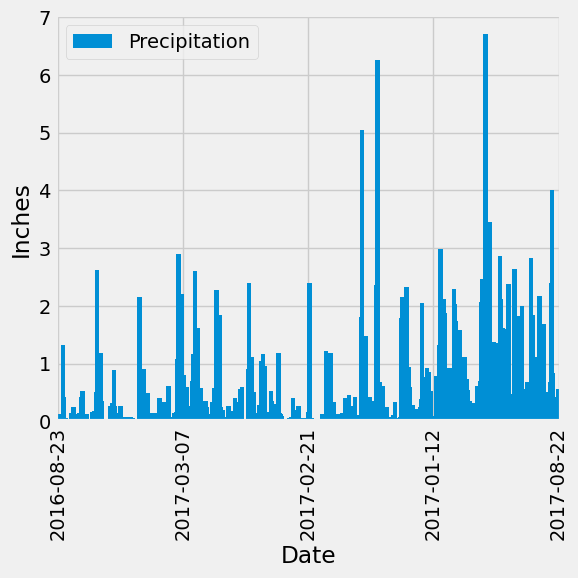

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_a_year_back = dt.date(2017, 8, 23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date,measurement.prcp).\
                  filter(measurement.date >= date_a_year_back).all()

# List comprehension solution
prcp_rows = [{"Date": result[0], "Precipitation": result[1]} for result in results]
prcp_rows

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_rows, columns=['Date', 'Precipitation'])
prcp_df
# Sort the dataframe by date
prcp_df.sort_values(by=['Date'])

# Use Pandas Plotting with Matplotlib to plot the data
# Calculate the number of data points
n = len(prcp_df)

# Calculate the step size for selecting tick indices
step = max(1, n // 4)

# Set the tick indices
tick_indices = list(range(0, n, step))

# Create the plot
prcp_df.plot.bar(x='Date', y='Precipitation', width=20,figsize=(6, 6))
plt.xticks(tick_indices, prcp_df['Date'].iloc[tick_indices], rotation=90)

# Set the axis labels and title
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()
plt.show()


In [55]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = pd.DataFrame(prcp_df['Precipitation'].describe())
summary_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [56]:
# Design a query to calculate the total number of stations in the dataset
station_count=session.query(func.count(station.name)).all()
station_count

[(9,)]

In [57]:
station_count=session.query((station.name)).all()
station_count

[('WAIKIKI 717.2, HI US',),
 ('KANEOHE 838.1, HI US',),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US',),
 ('PEARL CITY, HI US',),
 ('UPPER WAHIAWA 874.3, HI US',),
 ('WAIMANALO EXPERIMENTAL FARM, HI US',),
 ('WAIHEE 837.5, HI US',),
 ('HONOLULU OBSERVATORY 702.2, HI US',),
 ('MANOA LYON ARBO 785.2, HI US',)]

In [58]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

# List the stations and their counts in descending order.
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [59]:
# Filter the most active station from previous list
most_active_sation=active_stations[0][0]
most_active_sation

'USC00519281'

In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_stats=session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
            filter(measurement.station ==most_active_sation).all()

temp_stats

[(54.0, 85.0, 71.66378066378067)]

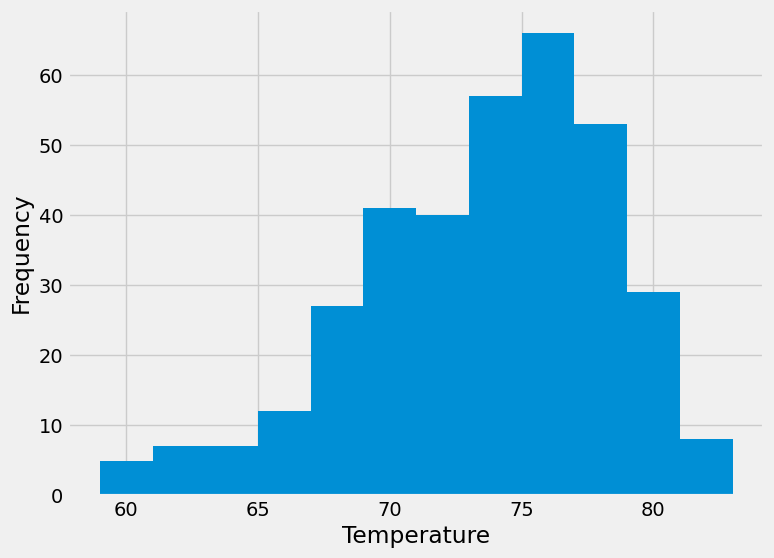

In [64]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.tobs).filter(measurement.date >=date_a_year_back).filter(measurement.station ==most_active_sation).all()

# Extract the temperature values from the results and save it as dataframe
temperatures_df = pd.DataFrame({"Temperature":[result[0] for result in results]})
temperatures_df


# Plot the results as a histogram
plt.figure(figsize=(8, 6))
temperatures_df['Temperature'].plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()


# Close Session

In [63]:
# Close Session
session.close()